
---

# 🧠 What is **Data Augmentation**?

---

## 👶 Baby-Level Analogy

Imagine you're teaching a robot to recognize **cats** 🐱. You have just **one photo of a cat**.

You ask:

* “What if I turn the photo a bit?” 🔁
* “What if I zoom in?” 🔍
* “What if I flip it horizontally?” 🔄

It's still a **cat**, right?

So, you create **new photos** from the original one by:

* Rotating it 🌀
* Zooming it 🔎
* Flipping it ↔️
* Adding noise 🌫️
* Changing brightness ☀️

That’s **data augmentation**:

> 📈 Create many slightly different versions of the **same data** so the model becomes **smarter and more robust**.

---

# 📸 Why Use Data Augmentation?

Because deep learning models are:

* **Data-hungry monsters** 😋
* They **overfit** easily if data is too small or too similar

### 💡 Benefits:

| Benefit                      | Why It Matters                          |
| ---------------------------- | --------------------------------------- |
| More data without collecting | Saves time and cost                     |
| Makes model robust           | Learns to recognize things in all forms |
| Reduces overfitting          | Avoids memorizing training data         |

---

# 🔁 Common Data Augmentation Techniques

| Technique         | What It Does                      | Visual |
| ----------------- | --------------------------------- | ------ |
| `rotation`        | Rotates image by a few degrees    | 🔄     |
| `width_shift`     | Moves image left or right         | ↔️     |
| `height_shift`    | Moves image up or down            | ↕️     |
| `zoom`            | Zooms in or out                   | 🔍     |
| `horizontal_flip` | Flips the image left-to-right     | 🪞     |
| `brightness`      | Makes the image lighter or darker | 🌞🌚   |
| `noise`           | Adds grain/noise to the image     | 🌫️    |

---

# 💻 Code Example in Keras

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Assuming you have X_train (images)
datagen.fit(X_train)
```

Now each time your model sees a sample, it might see a **slightly modified version**.

---

## 📐 Visual Example:

Original Image: 🐱

* Rotated: 🐱↪️
* Zoomed in: 🐱🔍
* Flipped: 🐱↔️
* Brighter: 🐱☀️
* Blurred: 🐱🌫️

All are still cats. But the model becomes **less sensitive to variation** and learns to focus on important parts.

---

## ⚠️ Notes:

| Point                                  | Explanation                                 |
| -------------------------------------- | ------------------------------------------- |
| Only applied on training data          | Not on test/validation                      |
| Doesn’t increase original dataset size | It just **changes it on the fly**           |
| You can save augmented images too      | If needed, with `.flow()` or `.save_to_dir` |

---

# 🧠 TL;DR Summary

| Term              | Meaning                                              |
| ----------------- | ---------------------------------------------------- |
| Data Augmentation | Creating **new training samples** from existing data |
| Why               | To avoid overfitting, improve robustness             |
| How               | Rotation, flipping, zooming, noise, etc.             |
| When              | During training only                                 |
| Tools             | `ImageDataGenerator`, `Albumentations`, etc.         |

---

## 💬 Final Analogy:

> Teaching a child to recognize their mom — even if she wears sunglasses, turns sideways, or stands in the dark.

That’s data augmentation.
It teaches models to **generalize, not memorize** 🧠✨.

---



In [1]:
! py -3.9 -m pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
from tensorflow import keras

Download the dataset from here "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
! dir

 Volume in drive D is New Volume
 Volume Serial Number is 2CEE-1A5E

 Directory of d:\Test\Python\Deep-Learning-Tuto\Tensorflow\Chapter 3

06/17/2025  02:43 PM    <DIR>          .
06/17/2025  02:15 AM    <DIR>          ..
06/17/2025  02:43 PM    <DIR>          .ipynb_checkpoints
06/16/2025  03:11 AM         3,602,415 3.1 Convolutional Neural Network.ipynb
06/16/2025  03:25 AM         1,817,917 3.2 Convolution Padding and Stride.ipynb
06/18/2025  10:01 PM         1,047,159 3.3 Data agumantation for overfitting.ipynb
06/17/2025  02:19 AM    <DIR>          datasets
               3 File(s)      6,467,491 bytes
               4 Dir(s)  133,926,141,952 bytes free


In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir=".",untar=True)

In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
image_count = len(list(data_dir.glob('*/*jpg')))
image_count

3670

In [8]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

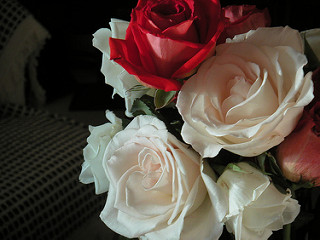

In [9]:


PIL.Image.open(str(roses[1]))

In [10]:
tulips = list(data_dir.glob('tulips/*'))
len(tulips)

799

In [11]:
from os import listdir


listdir(data_dir)

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [12]:
flower_image_dict = {
    "daisy": list(data_dir.glob('daisy/*')),
     'dandelion':list(data_dir.glob('dandelion/*')),
     'roses':list(data_dir.glob('roses/*')),
     'sunflowers':list(data_dir.glob('sunflowers/*')),
     'tulips':list(data_dir.glob('tulips/*')),
}

flower_label_dict = {
        "daisy": 0,
     'dandelion':1,
     'roses':2,
     'sunflowers':3,
     'tulips':4,
}

In [13]:
str(flower_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [14]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [15]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X = []
y = []

for flower_name, images in flower_image_dict.items():
    for image in images:    
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_label_dict[flower_name])

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
X[0]

array([[[134, 136, 136],
        [142, 142, 142],
        [146, 146, 146],
        ...,
        [152, 154, 154],
        [153, 153, 153],
        [151, 151, 151]],

       [[132, 134, 134],
        [140, 141, 141],
        [146, 146, 146],
        ...,
        [153, 155, 155],
        [153, 153, 153],
        [150, 150, 150]],

       [[131, 133, 134],
        [138, 140, 140],
        [144, 144, 145],
        ...,
        [152, 154, 154],
        [151, 151, 151],
        [146, 146, 146]],

       ...,

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [126, 127, 131],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [127, 128, 132],
        [126, 128, 131],
        [126, 128, 131]]

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [21]:
len(X_train), len(X_test)

(2752, 918)

In [22]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255


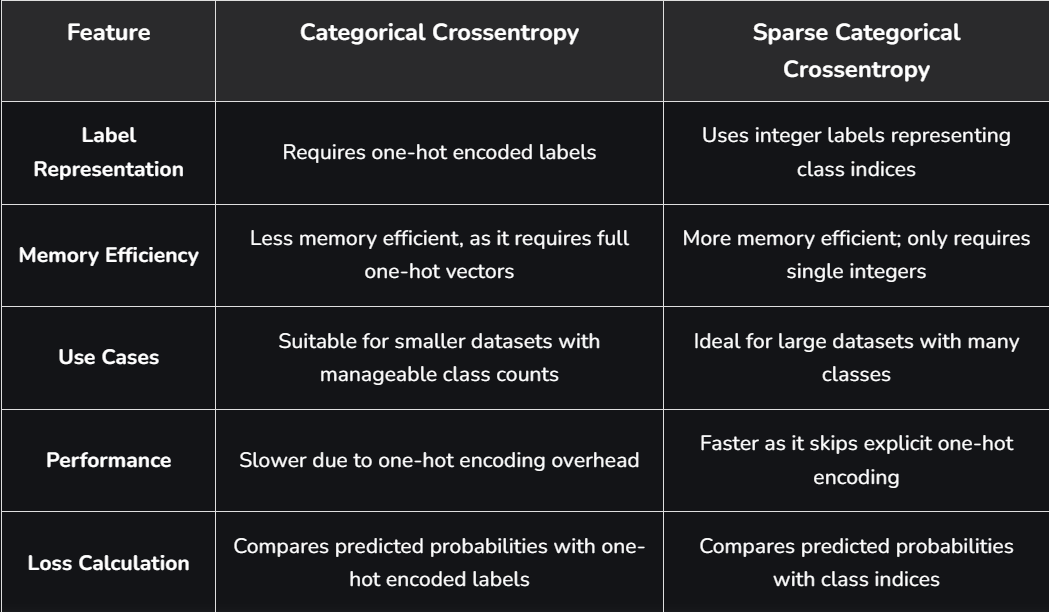

In [23]:
num_of_classes = 5

model = keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_of_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [25]:
model.fit(X_train_scaled,y_train,epochs=15)

Epoch 1/15
86/86 [==============================] - 3s 26ms/step - loss: 0.2612 - accuracy: 0.9095
Epoch 2/15
86/86 [==============================] - 2s 24ms/step - loss: 0.1579 - accuracy: 0.9499
Epoch 3/15
86/86 [==============================] - 2s 25ms/step - loss: 0.1010 - accuracy: 0.9738
Epoch 4/15
86/86 [==============================] - 2s 25ms/step - loss: 0.0449 - accuracy: 0.9887
Epoch 5/15
86/86 [==============================] - 2s 26ms/step - loss: 0.0387 - accuracy: 0.9909
Epoch 6/15
86/86 [==============================] - 2s 25ms/step - loss: 0.0178 - accuracy: 0.9964
Epoch 7/15
86/86 [==============================] - 2s 24ms/step - loss: 0.0084 - accuracy: 0.9993
Epoch 8/15
86/86 [==============================] - 2s 23ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 9/15
86/86 [==============================] - 2s 23ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/15
86/86 [==============================] - 2s 25ms/step - loss: 8.3290e-04 - accuracy: 1.0000
Epoch

In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 26ms/step - loss: 3.2171 - accuracy: 0.6122


[3.217116117477417, 0.6122004389762878]

In [27]:
predictions = model.predict(X_test_scaled)

29/29 [==============================] - 1s 17ms/step


In [28]:
predictions

array([[ -1.8787211, -10.382278 ,   9.760029 ,  -9.039482 ,  13.941089 ],
       [  2.1523223,   1.2175745,   2.5507636,  -9.015172 ,   2.8617616],
       [-11.513627 ,  -2.7100408,  -1.5036802,   2.4521167,   4.8049755],
       ...,
       [-12.82668  ,  -4.0924125,  -7.5516634,  12.681932 ,  -5.8380084],
       [ -8.18675  , -13.765794 ,  17.462786 , -14.607924 ,  16.847029 ],
       [ 21.202318 , -19.716629 ,  -2.2654283,  -6.715598 ,   1.231472 ]],
      dtype=float32)

In [32]:
score = tf.nn.softmax(predictions[2])

In [33]:
np.argmax(score)

4

In [34]:
y_test[2]

4

# From here our data augmentaion starts

In [39]:

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip('horizontal'), # Thats how you make a data augmentation function
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)

    
])

batch_size = 32
augmented_batches = []

for i in range(0, len(X), batch_size):
    # CPU-safe processing
    batch = tf.convert_to_tensor(X[i:i+batch_size])
    batch = tf.cast(batch, tf.float32) / 255.0
    augmented_batch = data_augmentation(batch, training=True)
    
    # Convert each batch to NumPy before storing to prevent GPU memory overload
    augmented_batches.append(augmented_batch.numpy())

# Now safely concatenate using NumPy
X_augmented = np.concatenate(augmented_batches, axis=0)

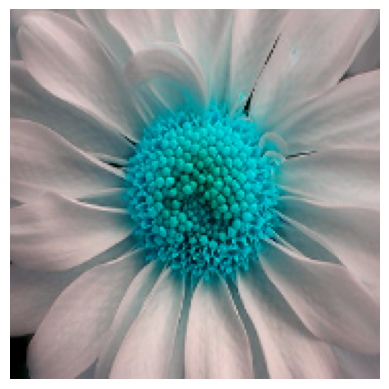

In [36]:
plt.axis('off')
plt.imshow(X_augmented[0])

(-0.5, 179.5, 179.5, -0.5)

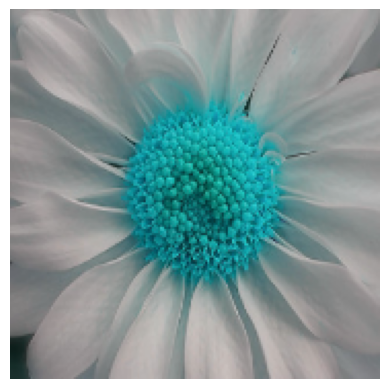

In [37]:
plt.imshow(X[0])
plt.axis("off")

In [ ]:
num_of_classes = 5

model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_of_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_augmented,y,test_size=0.25,random_state=1)

In [42]:
model.fit(X_train,y_train,epochs=15)

Epoch 1/15
86/86 [==============================] - 3s 24ms/step - loss: 1.3233 - accuracy: 0.4244
Epoch 2/15
86/86 [==============================] - 2s 24ms/step - loss: 1.0206 - accuracy: 0.6014
Epoch 3/15
86/86 [==============================] - 2s 23ms/step - loss: 0.8059 - accuracy: 0.6959
Epoch 4/15
86/86 [==============================] - 2s 22ms/step - loss: 0.6331 - accuracy: 0.7707
Epoch 5/15
86/86 [==============================] - 2s 23ms/step - loss: 0.4472 - accuracy: 0.8383
Epoch 6/15
86/86 [==============================] - 2s 24ms/step - loss: 0.2835 - accuracy: 0.8979
Epoch 7/15
86/86 [==============================] - 2s 24ms/step - loss: 0.1520 - accuracy: 0.9535
Epoch 8/15
86/86 [==============================] - 2s 25ms/step - loss: 0.1012 - accuracy: 0.9691
Epoch 9/15
86/86 [==============================] - 2s 24ms/step - loss: 0.0653 - accuracy: 0.9789
Epoch 10/15
86/86 [==============================] - 2s 25ms/step - loss: 0.0547 - accuracy: 0.9829
Epoch 11/

In [43]:
model.evaluate(X_test,y_test)

29/29 [==============================] - 1s 12ms/step - loss: 2.5293 - accuracy: 0.6078


[2.529266595840454, 0.6078431606292725]